In [79]:
#importando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#import plotly




In [7]:
#chamada do dataframe 

arquivo2 = ("tracks.csv")
dataframe2 = pd.read_csv(arquivo2)
dataframe2

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


## Funções para contagem de elementos, e transformação  de colunas em listas

In [8]:
def contagem  (dataframe2):

    
    c_iden = dataframe2.groupby(['id_artists']).size()
    c_release_date = dataframe2.groupby(['release_date']).size()
    c_danceability = dataframe2.groupby(['danceability']).size()
    c_energy  = dataframe2.groupby(['energy']).size()
    c_loudness = dataframe2.groupby(['loudness']).size()
   #c_mode = dataframe2.groupby(['mode']).size()
    c_speechiness =  dataframe2.groupby(['speechiness']).size()
    c_acousticness =  dataframe2.groupby(['acousticness']).size()
    c_instrumentalness =  dataframe2.groupby(['instrumentalness']).size()
    c_liveness = dataframe2.groupby(['liveness']).size()
    c_valence = dataframe2.groupby(['valence']).size()
    c_tempo = dataframe2.groupby(['tempo']).size()
    c_time_signature = dataframe2.groupby(['time_signature']).size()
    
    l_contagem = pd.Series([c_iden, c_release_date, c_danceability,  c_energy,  c_loudness,  c_speechiness ,c_acousticness,c_instrumentalness ,c_liveness, c_valence, c_tempo, c_time_signature ],
    index=["c_iden", "c_release_date", "c_danceability", " c_energy"," c_loudness", "c_speechiness" ,"c_acousticness","c_instrumentalness" ,"c_liveness","c_valence","c_tempo","c_time_signature"])
    
    return l_contagem




In [9]:
# chamar informações das listas acima :
contar = (contagem(dataframe2))
contar["c_liveness"]

liveness
0.00000    43
0.00572     1
0.00838     1
0.00967     1
0.00986     1
           ..
0.99600    12
0.99700    13
0.99800     4
0.99900     4
1.00000     4
Length: 1782, dtype: int64

In [10]:
# Colunas transformadas em lista caso seja nescessária alguma manipulação  extra 
def listagem (dataframe2):
    iden = (dataframe2['id'])
    name = (dataframe2['name'])
    popularity = (dataframe2['popularity'])
    duration_ms = (dataframe2['duration_ms']) 
    explicit = (dataframe2['explicit'])
    artists = (dataframe2['artists']) 
    id_artist = (dataframe2['id_artists'])
    release_date = (dataframe2['release_date'])
    danceability = (dataframe2['danceability'])
    energy = (dataframe2['energy'])
    loudness  = (dataframe2['loudness'])
    mode = (dataframe2['mode'])
    speechiness = (dataframe2['speechiness'])
    acousticness = (dataframe2['acousticness'])
    instrumentalness = (dataframe2['instrumentalness'])
    liveness = (dataframe2['liveness'])
    valence = (dataframe2['valence'])
    tempo = (dataframe2['tempo']) 
    time_signature = (dataframe2['time_signature'])
    
    l_listagem = pd.Series([iden,name,popularity,duration_ms,explicit,artists,id_artist,release_date,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature],
                           index=["iden","name","popularity","duration_ms","explicit","artists","id_artist","release_date","danceability","energy","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","time_signature"])
    return l_listagem

In [42]:
listar = (listagem(dataframe2))

data = listar["release_date"]
data.slice(4)

AttributeError: 'Series' object has no attribute 'slice'

In [11]:
# Outras ferramentas ...
'''
dataframe2['artists'].value_counts() 
dataframe2.iloc[142454]['artists'])
dataframe2f.groupby(['artists']).count() 
df["release_date"].isna().sum()
(dataframe2['artists'])
'''



"\ndataframe2['artists'].value_counts() \ndataframe2.iloc[142454]['artists'])\ndataframe2f.groupby(['artists']).count() \n\n(dataframe2['artists'])\n"

In [49]:
#Dataframe alterado

arquivo2 = ("tracks.csv")
df = pd.read_csv(arquivo2)




In [50]:
df.apply(lambda x: x["release_date"][0:4], axis=1)

0         1922
1         1922
2         1922
3         1922
4         1922
          ... 
586667    2020
586668    2020
586669    2020
586670    2021
586671    2015
Length: 586672, dtype: object

## Obtendo  máximos, mínimos, média, moda, mediana,  e desvio padrão :

In [12]:
def moda(lispan):
    comuns = Counter(lispan).most_common()
    if (comuns[0][1]!=comuns[1][1]):
        return(f"moda = {comuns[0][0]}")
    else:
        modas=[comuns[0][0],comuns[1][0]]
        contador=2
        while(comuns[0][1]==comuns[contador][1]):
            modas.append(comuns[contador][0])
            contador+=1
            if contador==len(Counter(lispan)):
                break
        return(f"modas = {modas}")

In [13]:
def detalhes(lista):
    doindex=0
    for x in lista:
        print(lista.index[doindex])
        doindex+=1
        pand=pd.Series(x)
        y=pand.describe()
        valores=["quantidade","media","mediana","moda","desvio padrão","menor","%25","%50","%75","maior"]
        contador=0
        for h in y:
            if contador==2:
                print(f"{valores[contador]} = {pand.median()}")
                contador+=1
                print(moda(pand))
                contador+=1
            if (contador>8) or (contador<6):
                print(f"{valores[contador]} = {h}")
            contador+=1
        print("\n")
detalhes(lista)

c_iden
quantidade = 115062.0
media = 5.098746762614938
mediana = 1.0
moda = 1
desvio padrão = 23.21763674850979
menor = 1.0
maior = 3856.0


c_release_date
quantidade = 19700.0
media = 29.780304568527917
mediana = 10.0
moda = 1
desvio padrão = 150.83652205790986
menor = 1.0
maior = 2893.0


c_danceability
quantidade = 1285.0
media = 456.55408560311287
mediana = 237.0
moda = 3
desvio padrão = 495.2897241197066
menor = 1.0
maior = 1483.0


 c_energy
quantidade = 2571.0
media = 228.18825359782187
mediana = 25.0
moda = 1
desvio padrão = 302.40758364822904
menor = 1.0
maior = 847.0


 c_loudness
quantidade = 29196.0
media = 20.09425948760104
mediana = 12.0
moda = 1
desvio padrão = 19.548484958823096
menor = 1.0
maior = 116.0


c_speechiness
quantidade = 1655.0
media = 354.4845921450151
mediana = 163.0
moda = 18
desvio padrão = 478.78185397774575
menor = 2.0
maior = 2002.0


c_acousticness
quantidade = 5217.0
media = 112.45390070921985
mediana = 25.0
moda = 1
desvio padrão = 207.100459438597

## Gráficos  de  caixa

In [14]:
tracksTypes = dataframe2.dtypes
tracks = dataframe2
tracksTypes

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

<AxesSubplot:>

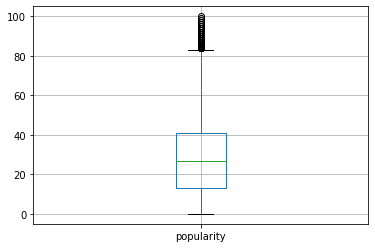

In [15]:
tracks.boxplot(column="popularity")

<AxesSubplot:>

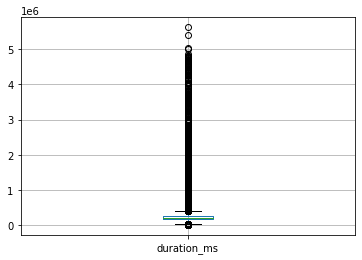

In [16]:
tracks.boxplot(column="duration_ms")

<AxesSubplot:>

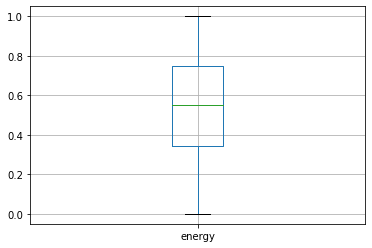

In [17]:
tracks.boxplot(column="energy")

<AxesSubplot:>

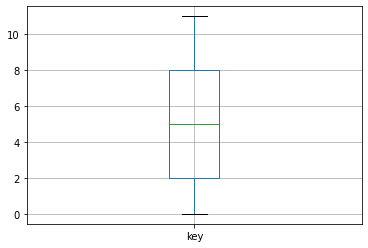

In [18]:
tracks.boxplot(column="key")

<AxesSubplot:>

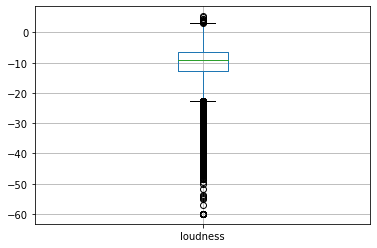

In [19]:
tracks.boxplot(column="loudness")

<AxesSubplot:>

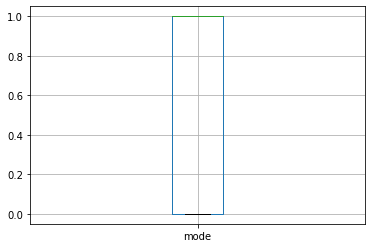

In [20]:
tracks.boxplot(column="mode")

<AxesSubplot:>

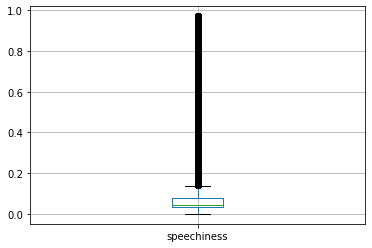

In [21]:
tracks.boxplot(column="speechiness")

<AxesSubplot:>

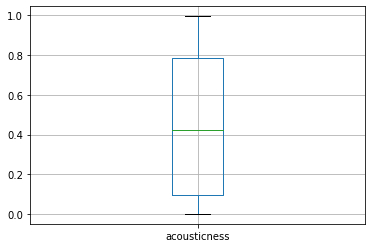

In [22]:
tracks.boxplot(column="acousticness") 

<AxesSubplot:>

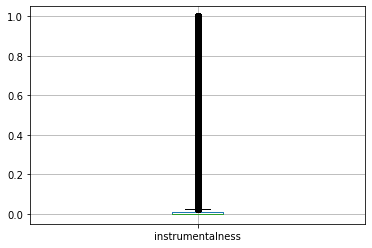

In [23]:
tracks.boxplot(column="instrumentalness")  

<AxesSubplot:>

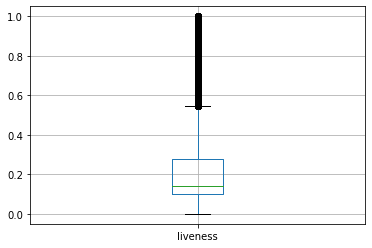

In [24]:
tracks.boxplot(column="liveness")   

<AxesSubplot:>

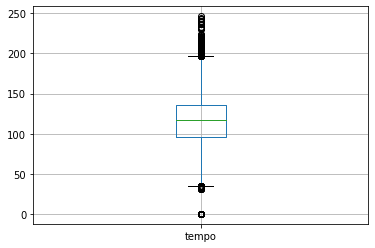

In [25]:
tracks.boxplot(column="tempo")  

<AxesSubplot:>

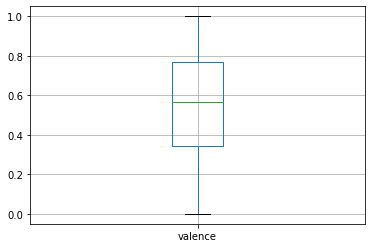

In [26]:
tracks.boxplot(column="valence")

### Visualização de dados

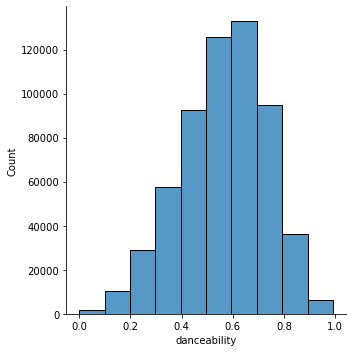

In [27]:
sns.displot(data=dataframe2, x='danceability', bins=10)


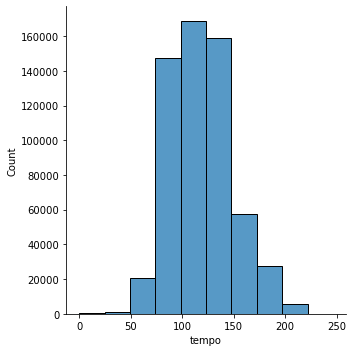

In [28]:
sns.displot(data=dataframe2, x='tempo', bins = 10)

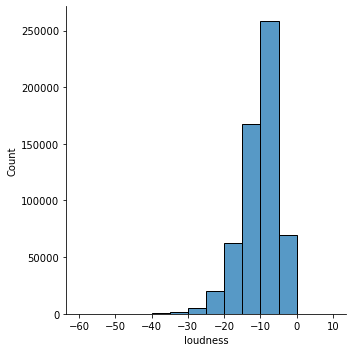

In [29]:
sns.displot(data=dataframe2, x='loudness',  binwidth=5)

<AxesSubplot:xlabel='energy', ylabel='loudness'>

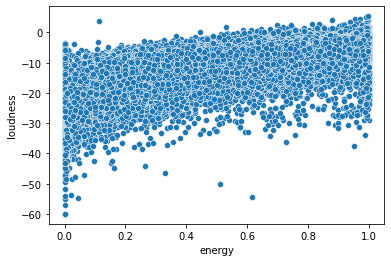

In [30]:
sns.scatterplot(data=dataframe2, x='energy', y='loudness')

<AxesSubplot:xlabel='tempo', ylabel='speechiness'>

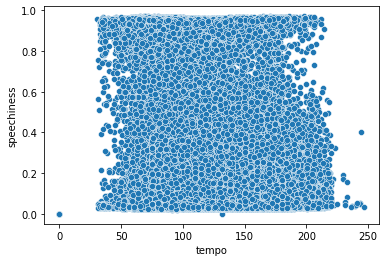

In [31]:
sns.scatterplot(data=dataframe2, x='tempo', y='speechiness')

<AxesSubplot:xlabel='popularity', ylabel='instrumentalness'>

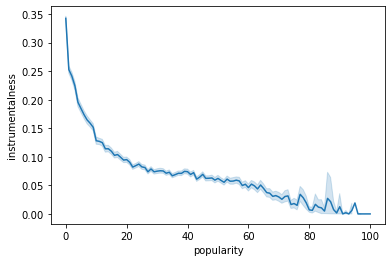

In [32]:
sns.lineplot(data=dataframe2, x='popularity', y='instrumentalness')

##    Agrupamento

<AxesSubplot:xlabel='instrumentalness', ylabel='speechiness'>

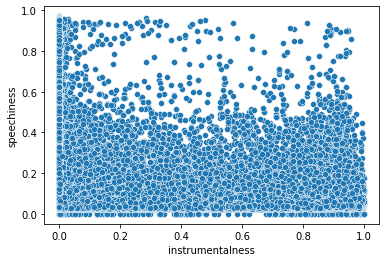

In [78]:
#plt.figure(figsize=(10,4),dpi=100)
sns.scatterplot(data=dataframe2, x='instrumentalness', y='speechiness',)
#sns.scatterplot(data= dataframe2.loc[dataframe2["speechiness"] <= 0.04 ],x='energy' , y='speechiness')

In [96]:
# Teste
arq = ("artists.csv")
data = pd.read_csv(arq)
data







,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0
...,...,...,...,...,...
1104344,6rJIG42vcWAf1UBdRFlQxB,3345.0,[],Cody Longo,8
1104345,1ljurfXKPlGncNdW3J8zJ8,2123.0,['deep acoustic pop'],Right the Stars,18
1104346,2vnT9YhKIvjVo9LnVjWmr2,26.0,[],Jesse Giddings,0
1104347,3ID0E5XCvnJIYZEq043ZoB,406.0,[],The Boy Band Project,0


In [112]:
#data.apply(lambda x: x=None if  len(x.genre) == 0 else: x.genre, axis=1)

c_genre = data.apply(lambda x: None if len(x["genres"]) == 2 else x["genres"], axis=1)

c_genre.isnull().sum()

805733

In [117]:
#data["genres"].value_counts()
#data["genres"].value_counts()
#dataframe2.groupby(["artists"]).count()

[]                                                                       805733
['background piano']                                                        293
['calming instrumental']                                                    255
['background music']                                                        245
['barnmusik']                                                               224
                                                                          ...  
['macedonian folk', 'macedonian pop', 'narodna muzika', 'turbo folk']         1
['croatian pop', 'tamburica', 'yugoslav rock']                                1
['balkan hip hop', 'serbian hip hop', 'turbo folk', 'yugoslav rock']          1
['montenegrin pop', 'turbo folk', 'yugoslav rock']                            1
['australian post-hardcore', 'metallic hardcore']                             1
Name: genres, Length: 48788, dtype: int64

In [149]:
#len(data.iloc[5]["genres"])dataframe2.loc[len(dataframe2["artists"]) > 2]
i_s = dataframe2.apply(lambda x: x["artists"].split(",") if len(x["artists"]) > 2 else x["artists"], axis=1)


In [118]:
'''
import plotly.graph_objects as go    #importing the library

matrix=dataframe2.corr()  #returns a matrix with correlation of all features
x_list=['popularity','duration_ms','explicit',
        'danceability','energy','key','loudness',
        'mode','speechiness','acousticness','instrumentalness',
        'liveness','valence','tempo','time_signature']

fig_heatmap = go.Figure(data=go.Heatmap(
                   z=matrix,
                   x=x_list,
                   y=x_list,
                   hoverongaps = False))
fig_heatmap.update_layout(margin = dict(t=200,r=200,b=200,l=200),
    width = 800, height = 650,
    autosize = False )

fig_heatmap.show()

'''



"\nimport plotly.graph_objects as go    #importing the library\n\nmatrix=dataframe2.corr()  #returns a matrix with correlation of all features\nx_list=['popularity','duration_ms','explicit',\n        'danceability','energy','key','loudness',\n        'mode','speechiness','acousticness','instrumentalness',\n        'liveness','valence','tempo','time_signature']\n\nfig_heatmap = go.Figure(data=go.Heatmap(\n                   z=matrix,\n                   x=x_list,\n                   y=x_list,\n                   hoverongaps = False))\nfig_heatmap.update_layout(margin = dict(t=200,r=200,b=200,l=200),\n    width = 800, height = 650,\n    autosize = False )\n\nfig_heatmap.show()\n\n"